In [ ]:
# VAE w/o correlation regularization for BC
# archetype
# Ec as W
# markers only

In [1]:
# load modules
import os
import sys
import gzip
import numpy as np
import scipy.stats as stats
import pandas as pd
import pickle
import anndata
import scanpy as sc
import scipy
import seaborn as sns

In [2]:
import phenograph # install from https://github.com/jacoblevine/PhenoGraph
import collections
from scipy.io import mmread,mminfo
from sklearn.decomposition import PCA

# Plotting imports
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#cell_dic
markers_df = pd.read_csv('Tcellsignatures_june2020_sele.csv')#pd.read_csv('/Users/xueerchen/Documents/spatial/bc/Tcellsignatures_june2020.csv')##('mouse_brain_marker_gene-SH.csv')
cells = markers_df.columns.values
marker_genes = []
#cell_dic = {}
cell_dic_plot = {}
for c in cells:
    cc = np.array(markers_df[c].values.tolist())
    marker_genes = np.append(marker_genes,[x for x in cc if str(x) != 'nan'])
    #cell_dic[c] = [x for x in cc if str(x) != 'nan']
    cell_dic_plot[c] = [x for x in cc if str(x) != 'nan']
    

In [4]:
#cell_dic
markers_df = pd.read_csv('BC_cellsignatures.csv')#pd.read_csv('/Users/xueerchen/Documents/spatial/bc/Tcellsignatures_june2020.csv')##('mouse_brain_marker_gene-SH.csv')
cells = markers_df.columns.values
marker_genes = []
#cell_dic = {}
cell_dic_plot = {}
for c in cells:
    cc = np.array(markers_df[c].values.tolist())
    marker_genes = np.append(marker_genes,[x for x in cc if str(x) != 'nan'])
    #cell_dic[c] = [x for x in cc if str(x) != 'nan']
    cell_dic_plot[c] = [x for x in cc if str(x) != 'nan']
  

In [4]:

sample_path = "data/2B/"#"/home/jiwei/miao/bc_visium_mod/data/Reosis_AA8934_TS-Reosis_1_A1_IGO_11934_1/"#'/home/jiwei/miao/bc_visium/MICHELLE_0212_AHJTWTDRXX__Project_10778__Sample_Patient2A_021120_IGO_10778_3/outs/' #path to directory with 'spatial' file
sample_count = 'filtered_feature_bc_matrix.h5'
adA = sc.read_visium(path=sample_path, count_file = sample_count, library_id='2B')#sc.read_visium(path=sample1_path, count_file = sample1_count, library_id='Reosis_AA8934_TS-Reosis_1_A1_IGO_11934_1')
adA.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
adA.uns

OverloadedDict, wrapping:
	OrderedDict([('spatial', {'2B': {'images': {'hires': array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32), 'lowres':

In [6]:
sc.pp.normalize_total(adA, inplace=True)
sc.pp.log1p(adA)
sc.pp.highly_variable_genes(adA, flavor="seurat", n_top_genes=5000, inplace=True)

tmp = pd.DataFrame(adA.X.toarray(),index=adA.obs.index.values,columns=adA.var.index.values)
tmp.index.name = 'cell_id'
print(tmp.shape)

(3202, 33538)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


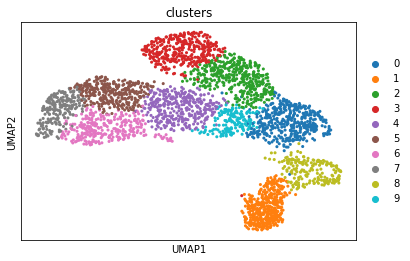

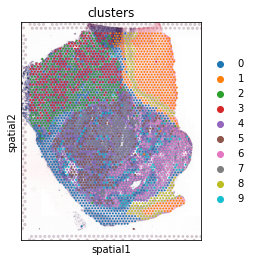

In [7]:
sc.pp.pca(adA)
sc.pp.neighbors(adA)
sc.tl.umap(adA)
sc.tl.leiden(adA, key_added="clusters")


sc.pl.umap(adA, color=["clusters"], wspace=0.4)

sc.pl.spatial(
        adA,
        img_key="hires",
        
        color="clusters"
    )

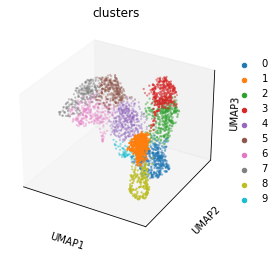

In [8]:
sc.tl.umap(adA,n_components=3)
sc.tl.leiden(adA, key_added="clusters")
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adA, color=["clusters"], wspace=0.4,projection='3d')

In [9]:
import scipy.sparse

exp_df = pd.DataFrame.sparse.from_spmatrix(adA.X)
exp_df.index = adA.obs.index
exp_df.columns = adA.var.index
exp_df.head()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGGGTCTATATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
RPS_genes = [i for i in exp_df.columns.values if i.startswith('RPS')]
print(len(RPS_genes))
RPL_genes = [i for i in exp_df.columns.values if i.startswith('RPL')]
print(len(RPL_genes))
MT_genes = [i for i in exp_df.columns.values if i.startswith('MT-')]
print(len(MT_genes))

print(exp_df.shape)
exp_df.drop(RPS_genes, axis=1,inplace=True)#df.drop(['B', 'C'], axis=1)
print(exp_df.shape)
exp_df.drop(RPL_genes, axis=1,inplace=True)
print(exp_df.shape)
exp_df.drop(MT_genes, axis=1,inplace=True)
print(exp_df.shape)

48
56
13
(3202, 33538)
(3202, 33490)
(3202, 33434)
(3202, 33421)


In [11]:
exp_df[exp_df.columns.intersection(set(marker_genes))].to_csv('adA_exp_markers_df_gsva_2B.csv')

In [19]:
gsva_scores1 = pd.read_csv('adA_markers_gsva_2B.csv',index_col=0)
gsva_scores2 = pd.read_csv('adA_markers_gsva_2B.csv',index_col=0)
gsva_scores3 = pd.read_csv('adA_markers_gsva_2B.csv',index_col=0) # for training BCE loss
#gsva_scores
for i in gsva_scores1.columns:
    
    gsva_scores2.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.9999), i] = 1#0.9999   
    gsva_scores2.loc[(gsva_scores1[i] > gsva_scores1[i].quantile(0.99))&(gsva_scores1[i] < gsva_scores1[i].quantile(0.9999)), i] = 2
    gsva_scores2.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.99), i] = 0


    gsva_scores3.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.7), i] = 1#0.9999   
    
    gsva_scores3.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.7), i] = 0
    
    #gsva_scores2.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.999), i] = 1#0.9999   
    #gsva_scores2.loc[(gsva_scores1[i] > gsva_scores1[i].quantile(0.99))&(gsva_scores1[i] < gsva_scores1[i].quantile(0.999)), i] = 2
    #gsva_scores2.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.99), i] = 0



In [20]:
gsva_scores1.columns = gsva_scores1.columns.str.replace(' ', '')
gsva_scores2.columns = gsva_scores2.columns.str.replace(' ', '')

<AxesSubplot:>

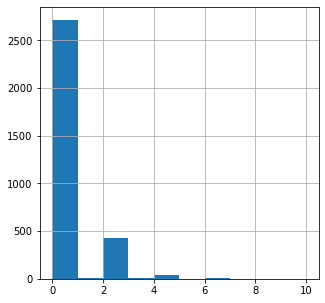

In [21]:
plt.rcParams["figure.figsize"] = (5, 5)
gsva_scores2.sum(axis=1).hist()

In [22]:
arches_val_ct = []

arch_spots_ct = []
#archs = []
spot_sizes_ct = []
cts_ct = []
#archs = []
for i in adA.obs.index:
    ds = gsva_scores2.loc[i,:]
    mask = ds == 1
    tmp = ds.loc[mask].index
    if len(tmp)==1:
        ct = tmp.values
        arches_val_ct = np.append(arches_val_ct,ct)
        arch_spots_ct = np.append(arch_spots_ct,i)
        #archs = np.append(archs,int(ct.split('_')[1]))
        spot_sizes_ct = np.append(spot_sizes_ct,500)
        
        
    else:
        arches_val_ct = np.append(arches_val_ct,'nan')
        spot_sizes_ct = np.append(spot_sizes_ct,50)
        
# nn
arches_nn_ct = []
arch_nn_spots_ct = []

for i in adA.obs.index:
    ds = gsva_scores2.loc[i,:]
    mask = ds == 2
    tmp = ds.loc[mask].index
    if len(tmp)==1:
        ct = tmp.values
        arches_nn_ct = np.append(arches_nn_ct,ct)
        arch_nn_spots_ct = np.append(arch_nn_spots_ct,i)
        
    else:
        arches_nn_ct = np.append(arches_nn_ct,'nan')
        
 



In [23]:
adA.obs['arches_val_ct'] = arches_val_ct#adA.obs['arches_nn_val'] = arches_val
adA.obs['arches_nn_ct'] = arches_nn_ct

In [24]:
adA.obs['arches_val_ct'].value_counts()

nan                                    3185
bcell                                     1
GNF2_MKI67                                1
CD8_T_cell_activation                     1
CD8+_deletional_tolerance                 1
Th17                                      1
Monocyte                                  1
Fibroblast                                1
Th9                                       1
Macrophage                                1
Exhaustion_Terminal_differentiation       1
Treg                                      1
CD8+_TIL_dysfunction                      1
Tfh                                       1
Th22                                      1
Effector_cell_cytotoxicity                1
NK                                        1
BC                                        1
Name: arches_val_ct, dtype: int64

In [25]:
adA.obs['arches_nn_ct'].value_counts()

nan                                    2773
BC                                       31
GNF2_MKI67                               31
CD8+_deletional_tolerance                30
CD8+_TIL_dysfunction                     30
Th17                                     29
Fibroblast                               27
bcell                                    26
NK                                       26
Exhaustion_Terminal_differentiation      25
Monocyte                                 25
Macrophage                               25
Th22                                     24
Treg                                     22
Th9                                      22
Tfh                                      21
Effector_cell_cytotoxicity               20
CD8_T_cell_activation                    15
Name: arches_nn_ct, dtype: int64

In [26]:
#tmp = pd.DataFrame(adA.X,index=adA.obs.index.values,columns=adA.var.index.values)
tmp = exp_df
tmp.index.name = 'cell_id'#tmp.index.name = 'cell_id'
#print(tmp.shape)
genes_sele = np.append(adA.var.loc[adA.var['highly_variable'] == True].index.values,marker_genes)
dt = tmp[tmp.columns.intersection(genes_sele)]
dt.shape


genes = dt.columns.values

#valid_cell_dic_all = {}

valid_cell_dic_ct = {}
for c,m1 in cell_dic_plot.items():
    m2 = [i for i in m1 if i in genes]
    #print(c,m2)
    if len(m2)>0:
        valid_cell_dic_ct[c] = m2
        #valid_cell_dic_all[c] = m2



In [27]:
# fix prior var calculation
# var: average expression of signature genes, var across NN
vars_arch_ct = []
tt = adA.obs
ttt = np.array(tt['arches_nn_ct'].unique())
#x[~numpy.isnan(x)]
for i in valid_cell_dic_ct.keys():#ttt[~np.isnan(ttt)]:#cell_dic_plot.keys():
    
    mask = tt['arches_nn_ct']==i
    spots = tt.loc[mask].index.values#adA.obs.loc[:,dA.obs.loc['arches_nn']].index.values()# df1.loc[:, df1.loc['a'] > 0]
    genes_sele = cell_dic_plot[i]
    var_n = np.sqrt(exp_df.loc[spots][exp_df.columns.intersection(genes_sele)].sum(axis=1).var())
    vars_arch_ct = np.append(vars_arch_ct,var_n)
    
vars_arch_ct

array([3.41730839, 3.53076333, 2.23629287, 2.20371733, 1.87848571,
       2.96944945, 0.78167274, 1.28591077, 2.96742316, 2.66025645,
       2.90489108, 1.56353498, 1.85238296, 2.14405413, 0.81408202,
       1.43426574, 1.54448184])

In [28]:
from __future__ import print_function, division

import os
GPU_id = 0
os.environ['CUDA_VISIBLE_DEVICES'] = str(GPU_id)
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

#import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
#from torchvision import transforms, utils



# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [29]:
class visiumDataset(Dataset):

    def __init__(self, exp_mat, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.spot_gene_exp = exp_mat
        idx = self.spot_gene_exp.index
        x = self.spot_gene_exp.values
        #x = np.log1p(x)
        self.spot_gene_exp = pd.DataFrame(x, columns=self.spot_gene_exp.columns, index=idx)
            
        #self.root_dir = root_dir
        #self.transform = transform

    def __len__(self):
        return len(self.spot_gene_exp)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = torch.Tensor(np.array(self.spot_gene_exp.iloc[idx,0:],dtype='float'))
        
        return sample





In [30]:
class VAE(nn.Module):
    def __init__(self,H,M,vars_arch_ct):
        super(VAE,self).__init__()

        self.vars_arch_ct = torch.from_numpy(vars_arch_ct).float()
        
        
        self.encoder = nn.Sequential(
            nn.Linear(M,40),#nn.Linear(M,400),
            nn.ReLU(),
            nn.Linear(40,H),#nn.Linear(400,H)
            #nn.ReLU(),
        )
        
        
        self.fc_mu_w = torch.nn.Parameter(torch.rand(H,H))
        self.fc_mu_b = torch.nn.Parameter(torch.rand(H))
        
         
        self.decoder = nn.Sequential(
            #nn.Linear(H,H),#50
            #nn.ReLU(),
            nn.Linear(H,40),#nn.Linear(H,400)
            nn.ReLU(),
            nn.Linear(40,M),#nn.Linear(400,6000)
        )
        
        # for the gaussian likelihood ????
        self.log_scale = nn.Parameter(torch.Tensor([0.0]))
        
        
    def forward(self, x, sample_cell_genes):
        # encode x to get the mu and variance parameters
        x_encoded = self.encoder(x)
        x_sample_cell = self.encoder(sample_cell_genes)#torch.eye(len(valid_cell_dic)).cuda()#self.encoder(sample_cell_genes)#*torch.eye(len(valid_cell_dic)).cuda()# multiply by identity mat or assign one identity mat directly
        #x_sample_cell_ct = self.encoder(sample_cell_genes_ct)
        
        mu = torch.matmul(x_encoded, self.fc_mu_w) + self.fc_mu_b#torch.matmul(x_encoded, self.fc_mu_w+x_sample_cell.T) + self.fc_mu_b
        #log_var = torch.matmul(x_encoded, self.fc_var_w) + self.fc_var_b#torch.matmul(x_encoded, self.fc_var_w+x_sample_cell.T) + self.fc_var_b
       
        mu_samp = torch.matmul(x_sample_cell, self.fc_mu_w) + self.fc_mu_b
        #print(mu_samp.shape)
        tt = torch.tensor(self.vars_arch_ct)#self.vars_arch
        #print(len(tt))
        std_samp = tt.repeat(mu_samp.shape[0], 1)#0.01*torch.ones(mu_samp.shape[0],mu_samp.shape[1]).cuda()#tt.repeat(mu_samp.shape[0], 1)#torch.exp(log_var_samp / 2)#0.1*torch.ones(mu_samp.shape[0],mu_samp.shape[1])#torch.exp(log_var_samp / 2)
        # sample z from q
        std = tt.repeat(mu.shape[0], 1)#0.01*torch.ones(mu.shape[0],mu.shape[1]).cuda()#tt.repeat(mu.shape[0], 1)
        
        #std_samp = torch.exp(log_var_samp / 2)
        # sample z from q
        #std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        #z = mu + (eps*std)
        q = torch.distributions.Normal(mu, std)
        z = q.rsample()
        
        q_samp = torch.distributions.Normal(mu_samp, std_samp)
        z_samp = q_samp.rsample()
        
        #z_samp = torch.eye(len(valid_cell_dic)).cuda()#np.identity(len(valid_cell_dic))

        # decoded 
        x_samp_hat = vae.decoder(z_samp)
        x_hat = vae.decoder(z) #?? self.
        return x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp
        

In [31]:
def gaussian_likelihood(mean, logscale, sample):
    scale = torch.exp(logscale)
    dist = torch.distributions.Normal(mean, scale)
    log_pxz = dist.log_prob(sample)
    return log_pxz.sum(dim=1)

def kl_divergence(z, mu, std):
    # --------------------------
    # Monte carlo KL divergence
    # --------------------------
    # 1. define the first two probabilities (in this case Normal for both)
    p = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(std))
    q = torch.distributions.Normal(mu, std)

    # 2. get the probabilities from the equation
    log_qzx = q.log_prob(z)
    log_pz = p.log_prob(z)

    # kl
    kl = (log_qzx - log_pz)
    kl = kl.sum(-1)
    return kl

In [32]:

#tmp = pd.DataFrame(adA.X,index=adA.obs.index.values,columns=adA.var.index.values)
tmp = exp_df
tmp.index.name = 'cell_id'#tmp.index.name = 'cell_id'
#print(tmp.shape)
genes_sele = np.append(adA.var.loc[adA.var['highly_variable'] == True].index.values,marker_genes)
dt = tmp[tmp.columns.intersection(genes_sele)]
dt.shape


#xx = dt.loc[[emptyDict[k] for k in list(valid_cell_dic.keys()) ]]
#dt = tmp[tmp.columns.intersection(ad1.var.loc[ad1.var['highly_variable'] == True].index.values)]
vd = visiumDataset(exp_mat=dt)#visiumDataset(exp_mat=xx.loc[xx.index.repeat(100)])#visiumDataset(exp_mat=dt)#visiumDataset(exp_mat=xx.loc[xx.index.repeat(10)])#visiumDataset(exp_mat=dt)#visiumDataset(exp_mat=dt)

import matplotlib.pyplot as plt
#plt.hist(dt.sum(axis=1))
#plt.show()

batch_size = 128

train_loader = torch.utils.data.DataLoader(
                 dataset=vd,#dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True,
                 num_workers=8,
                 #prefetch_factor=64,
)

x = next(iter(train_loader))
x.shape

print(x.min(), x.max(), x.mean())

x.shape

tensor(0.) tensor(8.7411) tensor(0.1788)


torch.Size([128, 5209])

In [33]:
len(arch_nn_spots_ct)

429

In [34]:
y_nn = pd.get_dummies(adA.obs.loc[arch_nn_spots_ct,'arches_nn_ct'])
#y_nn=y_nn.drop(columns=['nan'])
print(y_nn.shape)
print(y_nn.head())

(429, 17)
                    BC  CD8+_TIL_dysfunction  CD8+_deletional_tolerance  \
cell_id                                                                   
AAACAGGGTCTATATT-1   0                     0                          0   
AAACCGGGTAGGTACC-1   0                     1                          0   
AAAGGGCAGCTTGAAT-1   1                     0                          0   
AAATACCTATAAGCAT-1   0                     1                          0   
AAATCGTGTACCACAA-1   0                     0                          0   

                    CD8_T_cell_activation  Effector_cell_cytotoxicity  \
cell_id                                                                 
AAACAGGGTCTATATT-1                      0                           0   
AAACCGGGTAGGTACC-1                      0                           0   
AAAGGGCAGCTTGAAT-1                      0                           0   
AAATACCTATAAGCAT-1                      0                           0   
AAATCGTGTACCACAA-1        

In [35]:
y_ct = gsva_scores3.loc[arch_nn_spots_ct,:]#gsva_scores3.loc[arch_spots_ct,:]#arch_nn_spots_ct
#y_ct=y_ct.drop(columns=['nan'])
print(y_ct.shape)
print(y_ct.head())

(429, 17)
                    BC   bcell  CD8_T_cell_activation  \
AAACAGGGTCTATATT-1  0.0    1.0                    1.0   
AAACCGGGTAGGTACC-1  0.0    0.0                    0.0   
AAAGGGCAGCTTGAAT-1  1.0    0.0                    0.0   
AAATACCTATAAGCAT-1  0.0    0.0                    0.0   
AAATCGTGTACCACAA-1  0.0    1.0                    1.0   

                    CD8+_deletional_tolerance  CD8+_TIL_dysfunction  \
AAACAGGGTCTATATT-1                        0.0                   1.0   
AAACCGGGTAGGTACC-1                        1.0                   1.0   
AAAGGGCAGCTTGAAT-1                        1.0                   1.0   
AAATACCTATAAGCAT-1                        0.0                   1.0   
AAATCGTGTACCACAA-1                        0.0                   0.0   

                    Effector_cell_cytotoxicity  \
AAACAGGGTCTATATT-1                         1.0   
AAACCGGGTAGGTACC-1                         0.0   
AAAGGGCAGCTTGAAT-1                         0.0   
AAATACCTATAAGCAT-1  

In [37]:
# multiple repeat of pseudospots

z_sample_cell_label = torch.from_numpy(y_ct.to_numpy())#torch.from_numpy(y_nn.to_numpy())#adA.obs.loc[arch_spots,'arches_val'] #torch.from_numpy(y_test)
#torch.range(0,len(valid_cell_dic)-1).long()#torch.range(0,len(arch_spots)-1).long()#torch.Tensor(archs_sele).long()

H=len(vars_arch_ct)#len(cell_dic_plot.keys())+y.shape[1]#int(z_sample_cell_label.max())+1#no_c#len(valid_cell_dic)
M = dt.shape[1]
vae = VAE(H,M,vars_arch_ct)
print(vae)
vae_gpu = vae#.cuda()
optimizer = torch.optim.Adam(vae_gpu.parameters(),lr=1e-3)
#a.repeat(3)
 
xx = dt.loc[arch_nn_spots_ct]#dt.loc[[emptyDict[k] for k in list(valid_cell_dic.keys()) ]]##pd.DataFrame.sparse.from_spmatrix(arch_spots_exp.X)

sample_signatures = xx[dt.columns].to_numpy()#fix_cell_genes(len(cell_gene_ids.keys()),M)#fix_cell_genes(N=len(cell_gene_ids.keys()))#sample_cell_genes(20)
sample_signatures_r = sample_signatures#np.repeat(sample_signatures, repeats=1, axis=0)
sample_signatures_r = torch.from_numpy(sample_signatures_r).float()#.cuda()


EPOCHS = 200
for epoch in range(EPOCHS):
    losses = []
    elbos = []
    corr_ls = []
    ces = []
    for batch_idx,data in enumerate(train_loader):

        optimizer.zero_grad()
        #x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp
        x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp = vae_gpu(data,sample_signatures_r)
        
        # reconstruction loss
        #recon_loss = F.mse_loss(x_hat,data)
        #recon_loss = (x_hat - data).pow(2).mean(dim=1)
        recon_loss = gaussian_likelihood(x_hat, vae_gpu.log_scale, data)
        recon_loss_samp = gaussian_likelihood(x_samp_hat, vae_gpu.log_scale, sample_signatures_r)
        
        kl = kl_divergence(z, mu, std)
        #kl = torch.mean(-0.5 * torch.sum(1 + std - mu ** 2 - std.exp(), dim = 1), dim = 0)
        # elbo
        beta = 1
        elbo = (beta*kl - recon_loss)#(kl - recon_loss)#try beta vae
        elbo = elbo.mean()
        
        #ce = F.cross_entropy(mu_samp, z_sample_cell_label)
        ce_func = nn.BCEWithLogitsLoss()#F.cross_entropy(mu_samp, z_sample_cell_label)
        ce = ce_func(mu_samp,z_sample_cell_label.float())#bce_func(mu_samp, z_sample_cell_label)
   
        loss = elbo + ce*50#*50
        
        ces.append(ce.item())#ces.append(ce.cpu().detach().item())
        
        elbos.append(elbo.item())#elbos.append(elbo.cpu().detach().item())
        
        loss.backward()
        optimizer.step()

    #l = f'Loss:{np.mean(losses):.2f}'
    el = f'Elbo Loss:{np.mean(elbos):.2f}'
    cel = f'Cross Entropy Loss:{np.mean(ces):.2f}'
    #cl = f'Corr Loss:{np.mean(corr_ls):.2f}'
    #print(f'\r Train Epoch: {epoch+1}/{EPOCHS} {l} {el} {cl}')
    print(f'\r Train Epoch: {epoch+1}/{EPOCHS} {el} {cel}')



VAE(
  (encoder): Sequential(
    (0): Linear(in_features=5209, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=17, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=17, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=5209, bias=True)
  )
)
 Train Epoch: 1/200 Elbo Loss:5865.94 Cross Entropy Loss:0.77
 Train Epoch: 2/200 Elbo Loss:5384.16 Cross Entropy Loss:0.75
 Train Epoch: 3/200 Elbo Loss:5170.36 Cross Entropy Loss:0.74
 Train Epoch: 4/200 Elbo Loss:4969.17 Cross Entropy Loss:0.75
 Train Epoch: 5/200 Elbo Loss:4787.50 Cross Entropy Loss:0.81
 Train Epoch: 6/200 Elbo Loss:4603.18 Cross Entropy Loss:0.84
 Train Epoch: 7/200 Elbo Loss:4454.16 Cross Entropy Loss:0.83
 Train Epoch: 8/200 Elbo Loss:4316.09 Cross Entropy Loss:0.82
 Train Epoch: 9/200 Elbo Loss:4170.93 Cross Entropy Loss:0.80
 Train Epoch: 10/200 Elbo Loss:4048.94 Cross Entropy Loss:0.77
 Train Epoch: 11/200 Elbo Loss:3939.12

 Train Epoch: 126/200 Elbo Loss:1619.22 Cross Entropy Loss:0.59
 Train Epoch: 127/200 Elbo Loss:1623.25 Cross Entropy Loss:0.59
 Train Epoch: 128/200 Elbo Loss:1592.00 Cross Entropy Loss:0.60
 Train Epoch: 129/200 Elbo Loss:1601.57 Cross Entropy Loss:0.60
 Train Epoch: 130/200 Elbo Loss:1581.70 Cross Entropy Loss:0.60
 Train Epoch: 131/200 Elbo Loss:1574.10 Cross Entropy Loss:0.59
 Train Epoch: 132/200 Elbo Loss:1646.12 Cross Entropy Loss:0.59
 Train Epoch: 133/200 Elbo Loss:1563.84 Cross Entropy Loss:0.60
 Train Epoch: 134/200 Elbo Loss:1545.64 Cross Entropy Loss:0.59
 Train Epoch: 135/200 Elbo Loss:1596.94 Cross Entropy Loss:0.59
 Train Epoch: 136/200 Elbo Loss:1652.18 Cross Entropy Loss:0.59
 Train Epoch: 137/200 Elbo Loss:1681.54 Cross Entropy Loss:0.59
 Train Epoch: 138/200 Elbo Loss:1594.97 Cross Entropy Loss:0.59
 Train Epoch: 139/200 Elbo Loss:1619.63 Cross Entropy Loss:0.59
 Train Epoch: 140/200 Elbo Loss:1618.32 Cross Entropy Loss:0.59
 Train Epoch: 141/200 Elbo Loss:1571.98 

In [38]:
alldata_loader = torch.utils.data.DataLoader(
                 dataset=vd,#dataset=train_set,
                 batch_size=len(vd),
                 #shuffle=True,
                 num_workers=8,
                 #prefetch_factor=64,
)





In [39]:
for batch_idx,alldata in enumerate(alldata_loader):
    print(batch_idx,alldata.size()) 
    #sample_signatures = fix_cell_genes(len(cell_gene_ids.keys()),M)#sample_cell_genes(20)
    #sample_signatures_r = np.repeat(sample_signatures, repeats=5, axis=0)
    #sample_signatures_r = torch.from_numpy(sample_signatures_r).float().cuda()
    #sample_signatures = torch.from_numpy(sample_signatures).float().cuda()
    #x_encoded,x_sample_cell,x_hat,z,mu,std
    
    x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp = vae_gpu(alldata,sample_signatures_r) #vae_gpu(alldata.cuda(),sample_signatures_r) 

0 torch.Size([3202, 5209])


In [40]:
print(x_samp_hat.shape)
x_samp_hat_df =pd.DataFrame(x_samp_hat.cpu().detach().numpy())
x_samp_hat_df.columns = dt.columns
#x_samp_hat_df



torch.Size([429, 5209])


... storing 'arches_val_ct' as categorical
... storing 'arches_nn_ct' as categorical


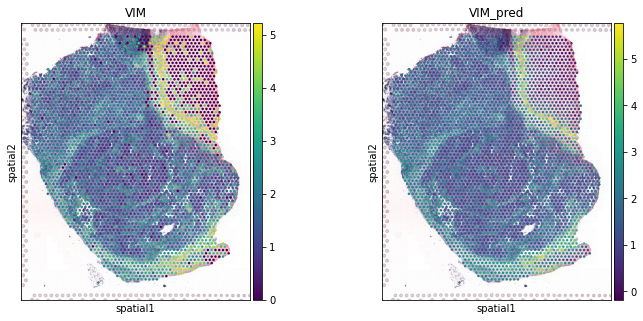

In [41]:
x_hat_df =pd.DataFrame(x_hat_all.cpu().detach().numpy())
x_hat_df.columns = dt.columns
x_hat_df
adA.obs['VIM_pred'] = x_hat_df['VIM'].values
sc.pl.spatial(adA,img_key="hires",color=['VIM','VIM_pred'])

In [42]:
bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = z_all.cpu().detach().numpy()
bn_df = pd.DataFrame(bn_all_np)
bn_df.columns = ['bn'+str(i+1) for i in bn_df.columns]

(17, 17)


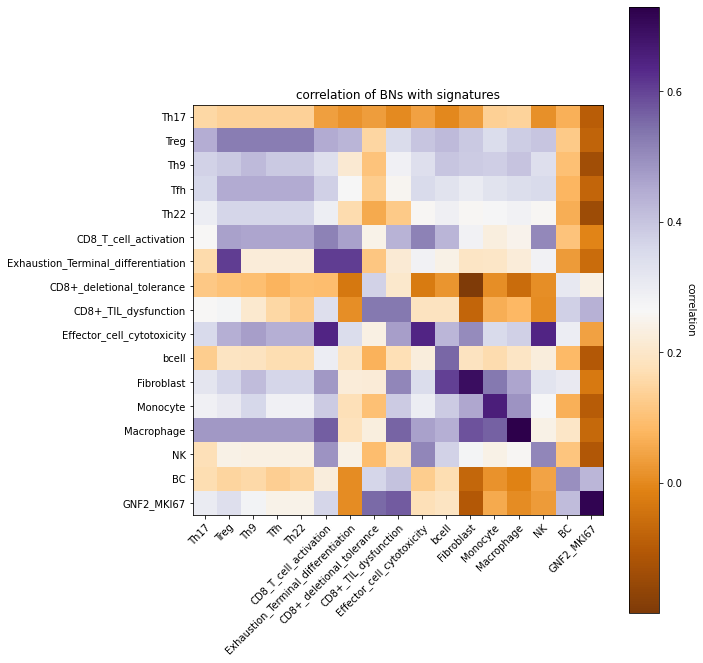

In [43]:
# cor based on pseudopots only
#x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp

# Declaring rows
N = len(gsva_scores1.columns.values[gsva_scores1.max(axis=0) > 0])#bn_df.shape[1]
  
# Declaring columns
M = len(valid_cell_dic_ct)
  
# Using * operator twice to initialize matrix
cor_bn_ct_marks = np.array([[0] * M] * N)
print(cor_bn_ct_marks.shape)
#res[0,0]
cor_bn_ct_df_marks = pd.DataFrame(cor_bn_ct_marks, columns = valid_cell_dic_ct.keys(),index = valid_cell_dic_ct.keys())#index = gsva_scores1.columns.values)
cor_bn_ct_df_marks.iloc[0,0]

#v3
for k in valid_cell_dic_ct.keys():
    gs = valid_cell_dic_ct[k]
    #ttt = pd.concat([gsva_scores1[gsva_scores1.columns], dt.loc[arch_spots,dt.columns.intersection(gs)]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], exp_mat[exp_mat.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)
    ttt = pd.concat([gsva_scores1.loc[arch_nn_spots_ct], dt.loc[arch_nn_spots_ct,dt.columns.intersection(gs)]], axis=1)
    tt = ttt.corr()
    
    for j in valid_cell_dic_ct.keys():#gsva_scores1.columns.values[gsva_scores1.max(axis=0) > 0]:
        data = np.array([tt[j].index,tt[j].tolist()])
        df = pd.DataFrame(data.T, columns = ['Name', 'cor_score']) 
        df.index = df['Name']
        cor_bn_ct_df_marks.loc[j,k] = df['cor_score'][df.index.intersection(gs)].max()#/len(gs)

plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots()
#cor_bn_ct_df_marks_n = cor_bn_ct_df_marks.dropna(axis='columns')
im = ax.imshow(cor_bn_ct_df_marks,#/cor_bn_ct_df_marks_n.max(axis=0),
               cmap="PuOr")

cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw
cbar.ax.set_ylabel('correlation', rotation=-90, va="bottom")
ax.set_xticks(np.arange(len(cor_bn_ct_df_marks.columns)))
ax.set_yticks(np.arange(len(cor_bn_ct_df_marks.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(cor_bn_ct_df_marks.columns)
ax.set_yticklabels(cor_bn_ct_df_marks.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(cor_bn_ct_df.columns)):
#    for j in range(len(cor_bn_ct_df.index)):
#        text = ax.text(j, i, cor_bn_ct_df[i, j],
#                       ha="center", va="center", color="w")



ax.set_title("correlation of BNs with signatures")
fig.tight_layout()
plt.show()

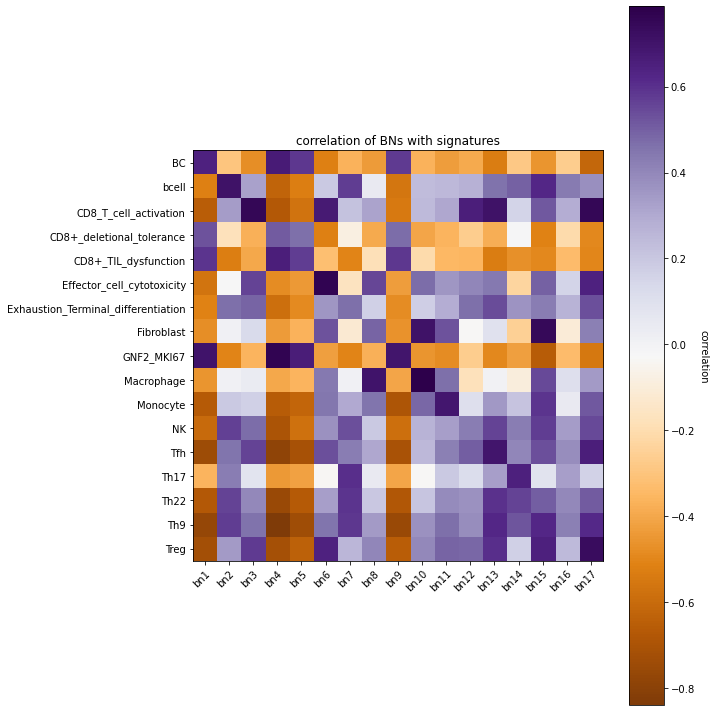

In [44]:
## cor BN with GSVA
# cor based on pseudopots only


#ttt = pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], gsva_scores1.loc[arch_spots,:]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], exp_mat[exp_mat.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)
    
#tt = ttt.corr()
#x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp
bn_samp_np = mu_samp.cpu().detach().numpy()
#bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = z_all.cpu().detach().numpy()
bn_df = pd.DataFrame(bn_samp_np)
bn_df.columns = ['bn'+str(i+1) for i in bn_df.columns]

bn_df.index =  arch_nn_spots_ct#np.concatenate((arch_spots, arch_spots_ct), axis=None)#dt.index


df1 = bn_df.loc[arch_nn_spots_ct,:]
df2 = gsva_scores1.loc[arch_nn_spots_ct]
df=pd.concat([df1, df2], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

fig, ax = plt.subplots()
#cor_bn_ct_df_marks_n = cor_bn_ct_df_marks.dropna(axis='columns')
#im = ax.imshow(df.divide(df.max(axis=1), axis=0),cmap="PuOr")#df/df.max(axis=1).values,#/df.max(axis=1),#/cor_bn_ct_df_marks_n.max(axis=0),

im = ax.imshow(df,cmap="PuOr")

cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw
cbar.ax.set_ylabel('correlation', rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.rcParams["figure.figsize"] = (6, 6)

ax.set_title("correlation of BNs with signatures")
fig.tight_layout()
plt.show()

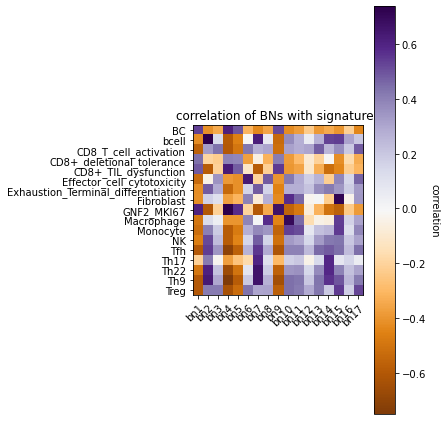

In [45]:
## cor BN with GSVA
# cor based on all spots


#ttt = pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], gsva_scores1.loc[arch_spots,:]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], exp_mat[exp_mat.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)
    
#tt = ttt.corr()
#x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp
bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = z_all.cpu().detach().numpy()
bn_df = pd.DataFrame(bn_all_np)
bn_df.columns = ['bn'+str(i+1) for i in bn_df.columns]

bn_df.index = gsva_scores1.index


df1 = bn_df#.loc[arch_spots,:]
df2 = gsva_scores1#.loc[bn_df.index,:]
df=pd.concat([df1, df2], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

fig, ax = plt.subplots()
#cor_bn_ct_df_marks_n = cor_bn_ct_df_marks.dropna(axis='columns')
#im = ax.imshow(df.divide(df.max(axis=1), axis=0),cmap="PuOr")#/df.max(axis=0),#/cor_bn_ct_df_marks_n.max(axis=0),
               
im = ax.imshow(df,cmap="PuOr")

cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw
cbar.ax.set_ylabel('correlation', rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.rcParams["figure.figsize"] = (10, 10)

ax.set_title("correlation of BNs with signatures")
fig.tight_layout()
plt.show()

LinAlgError: singular matrix

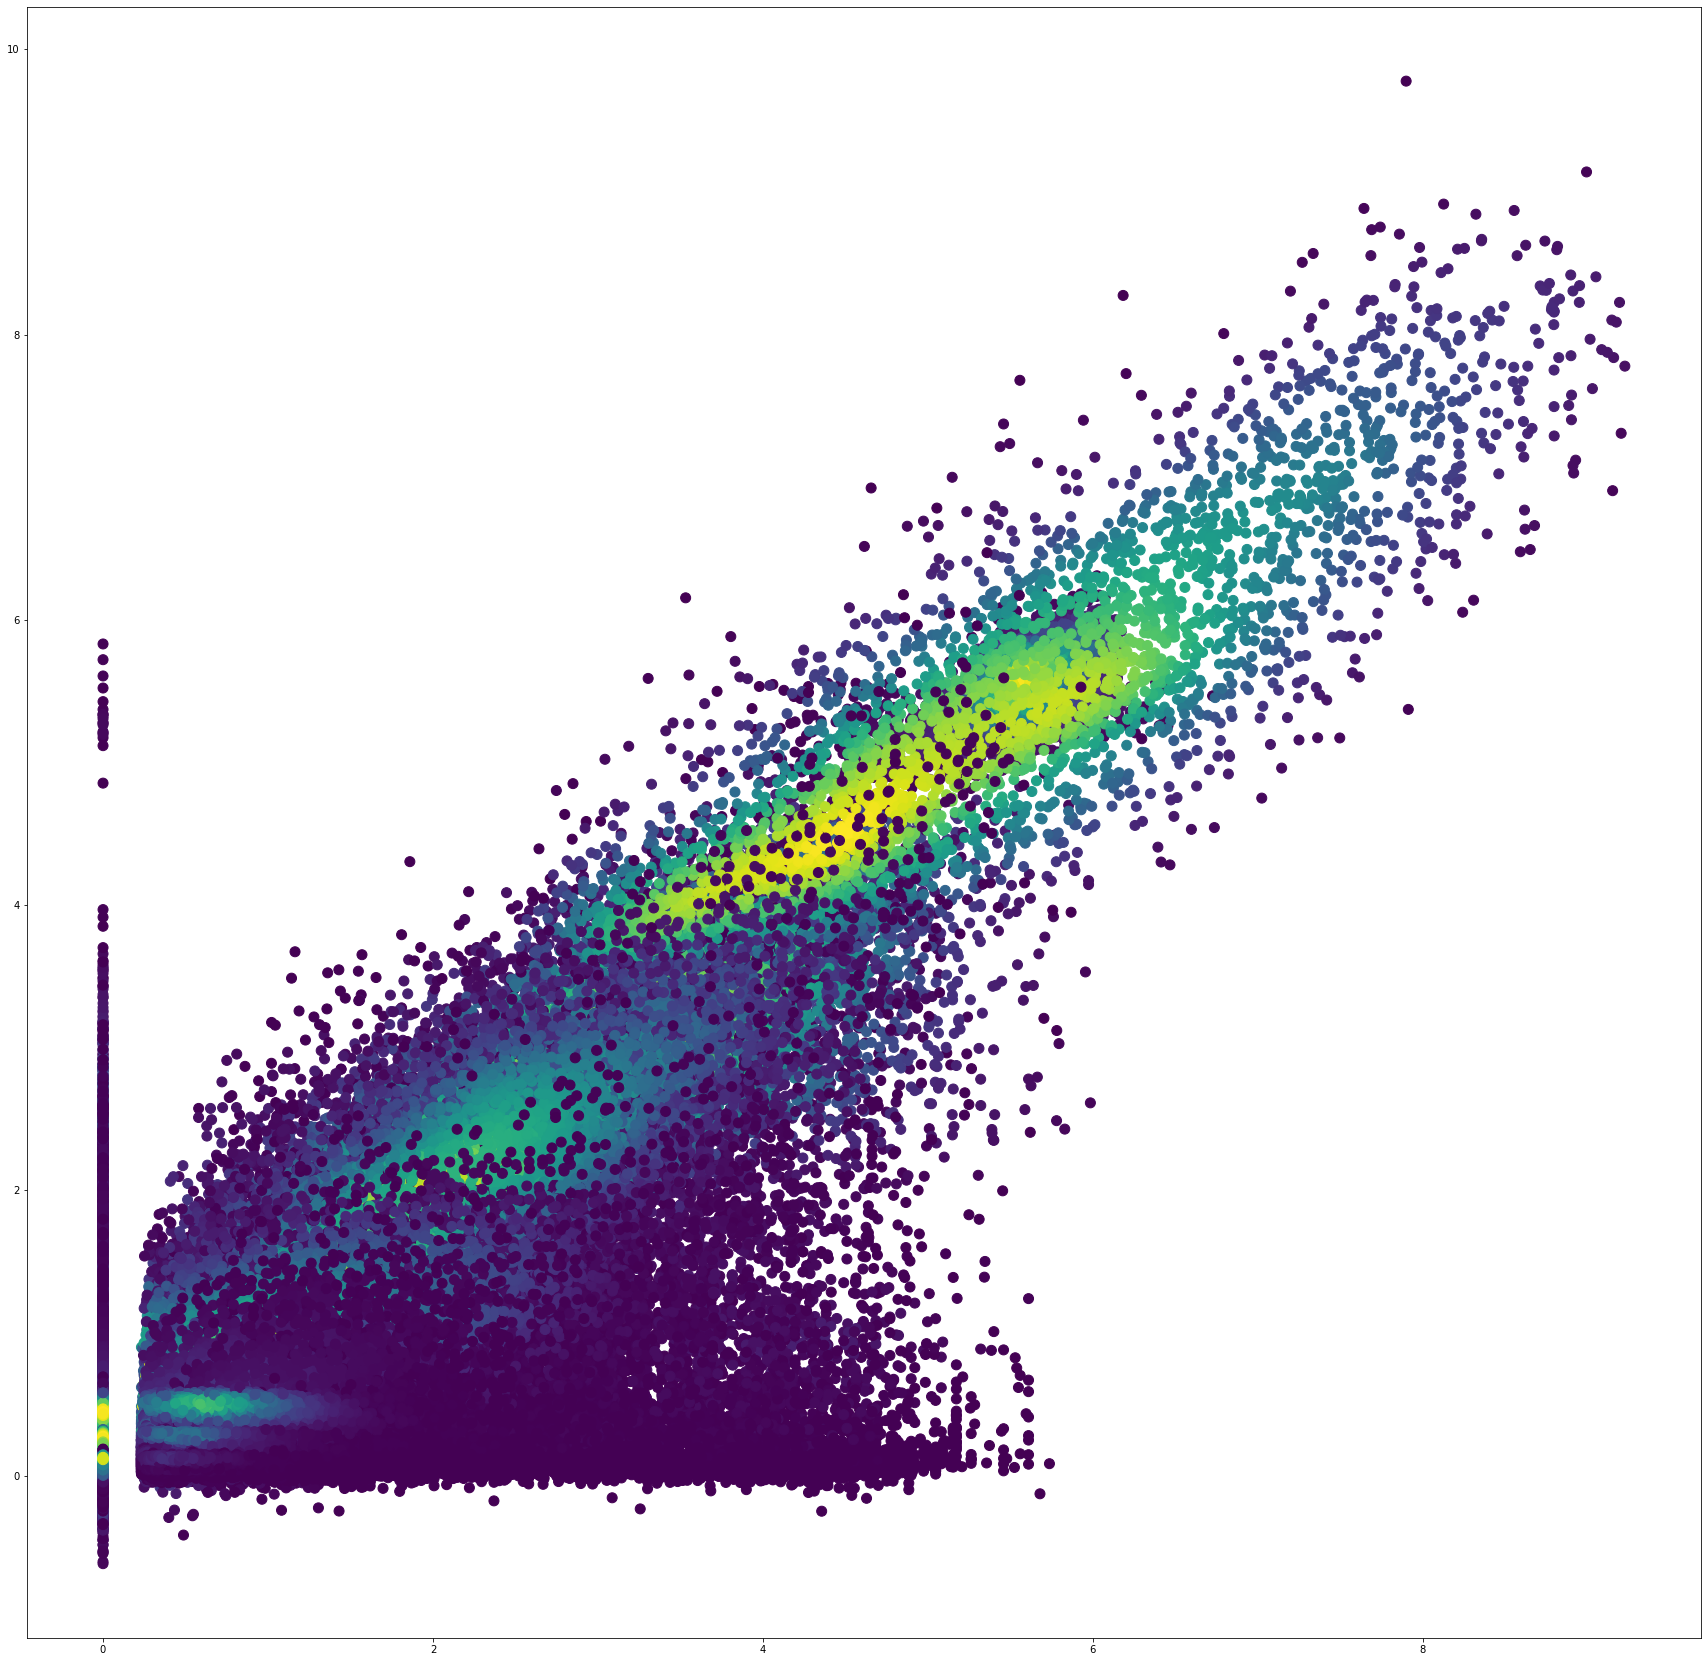

In [47]:
from scipy.stats import gaussian_kde
plt.rcParams["figure.figsize"] = (30, 30)
ax = plt.gca()
for i in dt.columns:
    #ax = plt.subplot(30,30,i+1)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    xx = dt[i].values
    yy = x_hat_df[i].values
    xy = np.vstack([xx,yy])
    z = gaussian_kde(xy)(xy)
    
    
    ax.scatter(xx, yy, c=z, s=100)
    #ax.scatter(xx, yy, s=100)
        #plt.scatter(dt[i].values, x_hat_df[i].values,color='red')
    

#https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
# dt[i].values, x_hat_df[i].values

In [ ]:
x_hat_df.index = dt.index

plt.rcParams["figure.figsize"] = (30, 30)
ax = plt.gca()
for i in dt.columns:
    #ax = plt.subplot(30,30,i+1)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    
    if i in marker_genes:
        plt.scatter(dt[i].values, x_hat_df[i].values,color='red')
    else:
        plt.scatter(dt[i].values, x_hat_df[i].values,color='green')

In [ ]:
for i in bn_df.columns:
    adA.obs[i] = bn_df[i].values
    sc.pl.umap(adA, color=i)

In [ ]:
g=sns.clustermap(bn_df,cmap='coolwarm')
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
for ii in bn_df.columns:
    
        sc.pl.spatial(
        adA,
        img_key="hires",
        
        color=ii
        
    )